In [150]:
import os
import math
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams["svg.fonttype"]="none"

In [151]:
#folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxt"
#folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/00_tests"
#folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxtSel2"
#folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/compRock"
folder_path="/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/_RAP2/txt"


filelist = []
for path, dirs, files in os.walk(folder_path):
    for filename in files:
        if 'txt' in filename :
                filelist.append(filename)
filelist.sort()
print(len(filelist))

#get classes in string
#class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxt/")
#class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/00_tests/")
#class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/PopPlinn/class/PopPlinnTxtSel2/")
#class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/compRock/")
class_path=os.chdir("/Users/laurentpottier/Documents/LP/Recherches/Projet_Fondation/Langages&Maths/Anaconda/LPanalyse/_RAP2/txt/")



716


In [152]:
def f_to_midi (f) :
    return 69+12*math.log(f/440,2)

print ("note de freq 261Hz :" , f_to_midi (261))

def midi_to_f (n) :
    return 440*2**((n-69)/12)

print ("frequence de note 60 :" , midi_to_f (60), "Hz")

def dx2x(intervalles):
    res=[0]
    for i in range (len (intervalles)):
        res.append(res[i]+intervalles[i-1])
    return res
               
def a2db (a):
    if(a<=0.000001):res = -120
    else:
        res = 20*math.log(a,10)
    return res

# version limitée à un ambitus 0 (0.001) - 60dB (1)               
def a2db60 (a):
    if(a<=0.001):res = 0
    else:res = 60+20*math.log(a,10)
    return res

print ("amp = 0.0 => amplitude en dB :" , round(a2db(0.000001), 3), "dB")
print ("amp = 0.0001 => amplitude en dB :" , round(a2db(0.0001), 3), "dB")
print ("amp = 0.5 => amplitude en dB :" , round(a2db(0.5), 3), "dB")
print ("amp = 1 => amplitude en dB :" , a2db(1), "dB")
print ("amp60 = 0 => amplitude60 en dB :" , a2db60(0), "dB")
print ("amp60 = 1 => amplitude60 en dB :" , a2db60(1), "dB")

note de freq 261Hz : 59.95855539654269
frequence de note 60 : 261.6255653005986 Hz
amp = 0.0 => amplitude en dB : -120 dB
amp = 0.0001 => amplitude en dB : -80.0 dB
amp = 0.5 => amplitude en dB : -6.021 dB
amp = 1 => amplitude en dB : 0.0 dB
amp60 = 0 => amplitude60 en dB : 0 dB
amp60 = 1 => amplitude60 en dB : 60.0 dB


In [153]:

f_ls = [21.5,32.3,43.1,53.8,64.6,86.1,107.7,140.0,172.3,215.3,269.2,344.5,441.4,549.1,699.8,872.1,1109.0,1388.9,1755.0,2217.9,2788.5,3520.7,4435.8,5587.9,7041.4,8871.7,11175.7,14071.9]

L = [] # liste des tailles des lignes
for k in range(27):
    L.append(4+2*k)

f_c = [] # frequences centrales des bandes
for i in range(len(f_ls)-1):
    f_c.append(math.sqrt(f_ls[i+1]*f_ls[i]))
    
f_c_midi = []
for i in range(len(f_c)):
    f_c_midi.append(f_to_midi(f_c[i]))

f_c_moy = 0 
for i in range(len(f_c)):
    f_c_moy += f_c[i]
    f_c_moy /= 27
    
f_c_gmoy = 0
for i in range(len(f_c)):
    f_c_gmoy += math.log(f_c[i], 2)
    f_c_gmoyR =  2**(f_c_gmoy/27)

#formule equivalente
#f_c_gmoy2 = 0
#for i in range(len(f_c)):
#    f_c_gmoy2 += f_to_midi(f_c[i])
#    f_c_gmoyR2 =  midi_to_f(f_c_gmoy2/27)

    
print("len(f_ls) :", len(f_ls), "bornes")
W=[]
for i in range(len(f_ls)-1):
    W.append(round(f_ls[i+1]-f_ls[i], 2))
print("w :" , W)    
    
print ("f_c :", f_c)
print ("f_c_moy :", round(f_c_moy,1), "Hz") # (en Hz) moyenne des frequences des centres des bandes 
print ("f_c_gmoyR :", round(f_c_gmoyR,1), "Hz") # (en Hz) moyenne des centres calculée par les notes MIDI
#print ("f_c_gmoyR :", f_c_gmoyR2) # (en Hz) moyenne des centres calculée par les notes MIDI

f_cA = np.asarray(f_c)
f_cA = f_cA[:, np.newaxis]
#print (round(3.149 , 2))


len(f_ls) : 28 bornes
w : [10.8, 10.8, 10.7, 10.8, 21.5, 21.6, 32.3, 32.3, 43.0, 53.9, 75.3, 96.9, 107.7, 150.7, 172.3, 236.9, 279.9, 366.1, 462.9, 570.6, 732.2, 915.1, 1152.1, 1453.5, 1830.3, 2304.0, 2896.2]
f_c : [26.352419243781014, 37.311258354550304, 48.15371221411699, 58.95320177903826, 74.57921962584483, 96.29626160968036, 122.79250791477467, 155.31258802814406, 192.60371232143996, 240.74625646102996, 304.53144336833265, 389.95166367128115, 492.31366018017417, 619.8872316800855, 781.2141703783924, 983.4423724855463, 1241.0842437159533, 1561.255744585108, 1972.9202974271413, 2486.8884474378824, 3133.28453064831, 3951.8503337044535, 4978.6350358306045, 6272.689938136588, 7903.745212239575, 9957.28164159275, 12540.467807462368]
f_c_moy : 478.5 Hz
f_c_gmoyR : 612.6 Hz


In [154]:
# read filetxt and generate array S
def read(filetext):
    with open(filetext) as f:
        mylist = f.read().splitlines()
        for x in range(8):
            mylist.pop(0)
        S=[]
        for element in reversed(mylist):
            element2=[float(i) for i in element.split()]
            S.append(element2)
        return S
    

In [155]:
file1 = filelist[0]
S1 = read(file1)
file2 = filelist[1]
S2 = read(file2)

print (file1)
print (file2)

Ju01_DelinquentHabitsCALIFORNIAFeatSenDogCypressHill2017.wav_sr44100_deb00_00_00_t02_50_pas05_00.txt
Ju01_DelinquentHabitsCALIFORNIAFeatSenDogCypressHill2017.wav_sr44100_deb00_05_00_t02_50_pas05_00.txt


In [156]:
# plus file name unite comme secondes 
def timetxt (filetext):
    str_L = filetext.rsplit(sep='_')
    test = 0
    result = 0
    for str in str_L:
        if test == 3:
            cent = int(str)
            result+=(cent/100)
            test = 0
        if test == 2:
            sec = int(str)
            test = 3
            result+=sec
        if re.search('deb', str):
            test = 1
            min = int(str[4-5])
            result+=(min*60)
            test = 2
    return result

print(timetxt("Rap2.wav_sr44100_deb00_00_00_t02_50_pas10_00.txt"))
#timetxt("AlanStivell_PopPlinn_1971m.wav_sr44100_deb00_45_00_t02_50_pas02_50.txt")


0.0


In [157]:
# moyennes des amplitudes par ligne (des fréquences basses vers hautes)
def moy_des_amps (S):
    Sk_mean=[]
    for k in range(27):
        sum_s=0
        for j in range(4+2*k):
            sum_s+=S[k][j]
        Sk_mean.append(sum_s/(4+2*k))
    return Sk_mean  
print("amps:",moy_des_amps(S1))

amps: [0.002953, 0.004347333333333333, 0.012935625, 0.034178400000000005, 0.027978083333333334, 0.04071842857142858, 0.06253418749999999, 0.028811444444444445, 0.0451551, 0.030181318181818184, 0.015103124999999997, 0.011254153846153848, 0.014972642857142853, 0.015787666666666665, 0.01063525, 0.011397029411764707, 0.013555583333333333, 0.015499605263157894, 0.013174825000000001, 0.012045714285714286, 0.011123909090909087, 0.009464499999999999, 0.008468229166666666, 0.0056386399999999995, 0.003118634615384615, 0.002282462962962963, 0.0014729107142857137]


In [158]:
#centroid
def centroid(S):
    Sk_mean = moy_des_amps(S)
    sum_sc=0
    sum_sfk=0
    for k in range(27):
        sum_sfk+=Sk_mean[k]*f_c[k]
        sum_sc+=Sk_mean[k]            
    if sum_sc == 0 :
        centroid=0
    else:
        centroid=sum_sfk/sum_sc
    #print('centroid' , centroid)
    return centroid

print("centroid:",round(centroid(S1)),"Hz")

centroid: 850 Hz


In [159]:
#variance et sd
def variance(S):
    Sk_mean=[]
    variance = 0
    for k in range(27):
        sum_s=0
        for j in range(4+2*k):
            sum_s+=S[k][j]
        Sk_mean.append(sum_s/(4+2*k))
    sum_var=0
    sum_skm=0
    for k in range(27):
        sum_var+=Sk_mean[k]*((f_c[k]-centroid(S))**2)
        sum_skm+=Sk_mean[k]
    if sum_skm > 0:
        variance=sum_var/sum_skm
    #print("variance", variance)
    return variance

# sd: 
def sd(filetext):
    sd=math.sqrt(variance(filetext))
    return sd

print("sd:",round(sd(S1)),"Hz")

sd: 1624 Hz


In [160]:
# sd: biased standard deviation (N)
def sdLow(S):
    Sk_mean = moy_des_amps(S)
    sum_sd=0
    sum_skm=0
    sdLow=0
    for k in range(27):
        diff=f_c[k]-centroid(S)
        if diff <0:
            sum_sd+=Sk_mean[k]*(diff**2)
            sum_skm+=Sk_mean[k]
    if sum_skm > 0:
        sdLow=math.sqrt(sum_sd/sum_skm)
    return sdLow

# sd: biased standard deviation (N)
def sdHigh(S):
    Sk_mean = moy_des_amps(S)
    sum_sd=0
    sum_skm=0
    sdHigh=0
    for k in range(27):
        diff=f_c[k]-centroid(S)
        if diff >0:
            sum_sd+=Sk_mean[k]*(diff**2)
            sum_skm+=Sk_mean[k]
    if sum_skm > 0:
        sdHigh=math.sqrt(sum_sd/sum_skm)
    return sdHigh
    
def c_min_sdlow(S): 
    return round(centroid(S) - sdLow(S),1)

def c_plus_sdHi(S): 
    return round(centroid(S) + sdHigh(S),1)


print("centroid:", round(centroid(S1),1),"Hz")
print("centre-ecartlow:", c_min_sdlow(S1),"Hz")
print("centre+ecartHigh:", c_plus_sdHi(S1),"Hz")

centroid: 850.4 Hz
centre-ecartlow: 177.1 Hz
centre+ecartHigh: 4000.0 Hz


In [161]:
#MIDI centroid
def midi_centroid(S):
    Sk_mean = moy_des_amps(S)
    sum_sc=0
    sum_sfk=0
    for k in range(27):
        sum_sfk+=Sk_mean[k]*f_to_midi(f_c[k])
        sum_sc+=Sk_mean[k]            
    if sum_sc == 0 :
        midi_centroid=0
    else:
        midi_centroid=sum_sfk/sum_sc
    #print('centroid' , centroid)
    return midi_centroid

In [162]:
#ecartHigh
def midi_ecartHigh(S): 
    Sk_mean = moy_des_amps(S) 
    sum_var=0 
    sum_skm=0 
    for k in range(27): 
        df = f_to_midi(f_c[k])-midi_centroid(S) 
        if df>0:
            sum_var+=Sk_mean[k]*(df**2)
            sum_skm+=Sk_mean[k]
    if sum_skm == 0 :
        varianceHigh=0
    else:
        varianceHigh=sum_var/sum_skm
    #print(\"variance\", variance)
    return math.sqrt(varianceHigh)

#ecartLow 
def midi_ecartLow(S): 
    Sk_mean = moy_des_amps(S) 
    sum_var=0 
    sum_skm=0 
    for k in range(27): 
        df = f_to_midi(f_c[k])-midi_centroid(S) 
        if df<0:
            sum_var+=Sk_mean[k]*(df**2)
            sum_skm+=Sk_mean[k]
    if sum_skm == 0 :
        varianceLow=0
    else:
        varianceLow=sum_var/sum_skm
    #print(\"variance\", variance)
    return math.sqrt(varianceLow)

def mc_min_eclow(S): 
    return round(midi_centroid(S) - midi_ecartLow(S),1)

def mc_plus_ecHi(S): 
    return round(midi_centroid(S) + midi_ecartHigh(S),1)

mcd = round(midi_centroid(S1),1)
mcd_eL = round(mc_min_eclow(S1),1)
mcd_eH = round(mc_plus_ecHi(S1),1)
print("midi_centroid:", mcd,"MIDI /", round(midi_to_f(mcd)),"Hz")
print("centr-ecartLow:", mcd_eL,"MIDI /", round(midi_to_f(mcd_eL),1),"Hz") 
print("centr+ecartHigh:", mcd_eH,"MIDI /", round(midi_to_f(mcd_eH),1),"Hz")


midi_centroid: 61.4 MIDI / 284 Hz
centr-ecartLow: 43.2 MIDI / 99.1 Hz
centr+ecartHigh: 92.4 MIDI / 1700.0 Hz


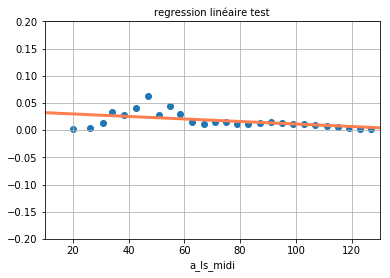

slope : -0.00023154747686418613


In [163]:
#midi spectral slope
def midi_spectral_slope_reg(S):
    f_csA_midi = np.asarray(f_c_midi)
    f_csA_midi = f_csA_midi[:, np.newaxis]
    Sk_meanA = np.asarray(moy_des_amps(S))
    Sk_meanA = Sk_meanA[:, np.newaxis]
    modeleReg = LinearRegression()
    modeleReg.fit(f_csA_midi, Sk_meanA)
    #plt.scatter(f_csA, Sk_meanA)
    return modeleReg

def midi_sp_slope (S):
    return midi_spectral_slope_reg(S).coef_[0][0]

def plot_slope(S):
    modeleReg = midi_spectral_slope_reg(S)
    f_csA_midi = np.asarray(f_c_midi)
    f_csA_midi = f_csA_midi[:, np.newaxis]
    Sk_meanA = np.asarray(moy_des_amps(S))
    Sk_meanA = Sk_meanA[:, np.newaxis]
    plt.scatter(f_csA_midi, Sk_meanA)
    
    x_min = 10
    x_max = 130

    X_NEW = np.linspace(x_min, x_max, 100)
    X_NEW = X_NEW[:,np.newaxis]

    Y_NEW = modeleReg.predict(X_NEW)

    plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)
    plt.grid()
    plt.xlim(x_min, x_max)
    plt.ylim(-0.2, 0.2)

    plt.title("regression linéaire test", fontsize=10)
    plt.xlabel('f_cs_midi')
    plt.xlabel('a_ls_midi')

    plt.savefig("simple_linear_regression_test_midi.png", bbox_inches='tight')
    plt.show()

plot_slope (S1)
print ("slope : " + str(midi_sp_slope(S1)))



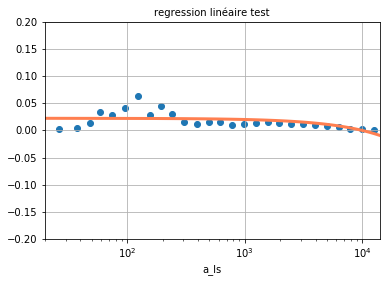

slope : -2.243517650083709e-06


In [164]:
#spectral slope
def spectral_slope_reg(S):
    f_csA = np.asarray(f_c)
    f_csA = f_csA[:, np.newaxis]
    Sk_meanA = np.asarray(moy_des_amps(S))
    Sk_meanA = Sk_meanA[:, np.newaxis]
    modeleReg = LinearRegression()
    modeleReg.fit(f_csA, Sk_meanA)
    #plt.scatter(f_csA, Sk_meanA)
    return modeleReg

def sp_slope (S):
    return spectral_slope_reg(S).coef_[0][0]

def plot_slope(S):
    modeleReg = spectral_slope_reg(S)
    f_csA = np.asarray(f_c)
    f_csA = f_csA[:, np.newaxis]
    Sk_meanA = np.asarray(moy_des_amps(S))
    Sk_meanA = Sk_meanA[:, np.newaxis]
    plt.scatter(f_csA, Sk_meanA)
    
    x_min = 20
    x_max = 14000

    X_NEW = np.linspace(x_min, x_max, 100)
    X_NEW = X_NEW[:,np.newaxis]

    Y_NEW = modeleReg.predict(X_NEW)

    plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)
    #plt.scale.LogScale
    plt.grid()
    plt.xlim(x_min, x_max)
    plt.txaxis=dict(type='log', autorange=True)
    plt.ylim(-0.2, 0.2)

    plt.title("regression linéaire test", fontsize=10)
    plt.xlabel('f_cs')
    plt.xlabel('a_ls')
    plt.xscale("log")

    plt.savefig("simple_linear_regression_test.png", bbox_inches='tight')
    plt.show()

plot_slope (S1)
print ("slope : " + str(sp_slope(S1)))



In [165]:
#spectral flatness 
def sp_flatness(S):
    Sk_mean = moy_des_amps(S)
    sum_skm=0
    mult_skm=1
    K=26
    for k in range(26):
        sum_skm+=Sk_mean[k]
        mult_skm*=max(Sk_mean[k], 0.00001)
        pow_skm=mult_skm**(1/K)
    if sum_skm == 0 :
        sf=0
    else:
        sf=pow_skm/((1/K)*sum_skm)
    return sf

print ("spectral_flatness:", sp_flatness(S1))

spectral_flatness: 0.7296854844285524


In [166]:
# moyennes des amplitudes par ligne (des fréquences basses vers hautes)
def produit_des_amps (S):
    Sk_mult=1
    for k in range(27):
        mult_s=1
        for j in range(4+2*k):
            mult_s*=max(S[k][j]**(0.5/(k+2)), 0.00000001)
        Sk_mult*=mult_s
    return Sk_mult  

# moyennes des amplitudes par ligne (des fréquences basses vers hautes)
def flatness_list (S):
    Sk_flat=[]
    for k in range(27):
        mult_s=1
        for j in range(4+2*k):
            mult_s*=max(S[k][j]**(0.5/(k+2)), 0.00000001)
        Sk_flat.append(mult_s)
    return Sk_flat  

#spectral flatness moyenne
def sp_flatness_moy(S):
    Sk_flat = flatness_list(S)
    Sm=0
    for k in range(27):
         Sm+=Sk_flat[k]
    #print(Sm)
    return Sm/27

#formule equivalente
def sp_flatness_moy2(S):
    Sk_flat = flatness_list(S)
    Sk_flatA = np.asarray(Sk_flat)
    return Sk_flatA.mean()

def sp_flatness_max(S):
    Sk_flat = flatness_list(S)
    Sm=0
    for k in range(27):
        if Sm<Sk_flat[k]:
            Sm=Sk_flat[k]
            value = k
    return [value, f_c[value], Sm]
         
    #print(Sm)
    return Sm/27

def sp_flatness_min(S):
    Sk_flat = flatness_list(S)
    Sm=1
    for k in range(27):
        if Sm>Sk_flat[k]:
            Sm=Sk_flat[k]
            value = k
    return [value, f_c[value], Sm]

def sp_flatness_maxamp(S):
    return sp_flatness_max(S)[2]
def sp_flatness_maxfreq(S):
    return sp_flatness_max(S)[1]
def sp_flatness_minamp(S):
    return sp_flatness_min(S)[2]
def sp_flatness_minfreq(S):
    return sp_flatness_min(S)[1]

print("sp_flatness_maxamp:", sp_flatness_maxamp(S1))
print("sp_flatness_maxfreq:", sp_flatness_maxfreq(S1))
print("sp_flatness_minamp:", sp_flatness_minamp(S1))
print("sp_flatness_minfreq:", sp_flatness_minfreq(S1))

sp_flatness_maxamp: 0.045310210667005996
sp_flatness_maxfreq: 122.79250791477467
sp_flatness_minamp: 8.240205116255148e-12
sp_flatness_minfreq: 12540.467807462368


In [167]:
def sp_crest(S):
    Sk_mean = moy_des_amps(S)
    sum_skm=0
    K=27
    max_skm=[]
    for k in range(27):
        sum_skm+=Sk_mean[k]
        for j in range(4+2*k):
            max_skm.append(np.max(S[k][j]))
    max_sk=max(max_skm)
    screst=max_sk/((1/K)*sum_skm)
    return screst

print(sp_crest(S1))

10.639255102149143


In [168]:

# rms with original value of frequency bin k=27
def rms(S):
    Sk_mean = moy_des_amps(S)
    sum_skr=[]
    for k in range(27):
        sum_sk=0
        for j in range(L[k]):
            sum_sk+= (1/L[k])*(S[k][j]**2)
        sum_skr.append(sum_sk)
    #print(sum_skr)
    sum_rms=0
    for k in range(27):
        sum_rms+=sum_skr[k]
    rms=math.sqrt(sum_rms)
    return rms  

print(rms(S1))

0.14742420529496061


In [169]:
# maxfreq25 (amp max de la bande 25) approx 8000Hz
def maxfreq25(S):
    maxfreq25=max(S[25])
    return maxfreq25

In [170]:
def skewness(S):
    Sk_mean = moy_des_amps(S)
    sum_sk=0
    sum_skm=0
    for k in range(27):
        sum_sk+=Sk_mean[k]*((f_c[k]-centroid(S))**3)
        sum_skm+=Sk_mean[k]
    if sum_skm == 0:
        skewness = 0
    else :
        skewness=(sum_sk/sum_skm)/(sd(S)**3)
    return skewness

print(skewness(S1))


def kurtosis(S):
    Sk_mean = moy_des_amps(S)
    sum_kt=0
    sum_skm=0
    for k in range(27):
        sum_kt+=Sk_mean[k]*((f_c[k]-centroid(S))**4)
        sum_skm+=Sk_mean[k]
    if sum_skm == 0:
        kurtosis = 0
    else :
        kurtosis=(sum_kt/sum_skm)/(sd(S)**4)
    return kurtosis

print(kurtosis(S1))

3.5372387147614615
18.44272718632188


In [171]:
def sp_rolloff(S):
    Sk_mean = moy_des_amps(S)
    sum_skm=0
    sum_rf=0
    for k in range(27):
        sum_skm+=Sk_mean[k]
    for k in range(27):
        sum_rf+=Sk_mean[k]
        if sum_rf>=0.85*sum_skm:
            rf=f_c[k]
            break
    return rf

In [172]:
#amps max et min
def max_amp(S):
    maxs = []
    for k in range(27):
        maxs.append(max(S[k]))
    return max(maxs)

def max_amoy(S):
    return max(moy_des_amps(S))

def min_amp(S):
    mins = []
    for k in range(27):
        mins.append(min(S[k]))
    return min(mins)
                    
print('max_amp :',round(max_amp(S1),3))
print('max_amoy :',round(max_amoy(S1),3))
print('min_amp :',round(min_amp(S1),5))

max_amp : 0.183
max_amoy : 0.063
min_amp : 0.0


In [173]:
def max_freq(S):
    maxs = []
    maxi = 0
    indx = 0
    for k in range(27):
        maxs.append(max(S[k]))
    maxi = max(maxs)
    indx = maxs.index(maxi)
    #print ("indx :", indx, "amp :", maxs[indx])
    return f_c[indx]

def max_moy_freq(S):
    maxs = moy_des_amps(S)
    maxi = max(maxs)
    indx = maxs.index(maxi)
    #print ("indx :", indx, "amp :", maxs[indx])
    return f_c[indx]


print('max_freq :',round(max_freq(S1),5))
print('max_moy_freq :',round(max_moy_freq(S1),5))

max_freq : 192.60371
max_moy_freq : 122.79251


In [174]:
def mode_freq(S):
    Sk_mean = moy_des_amps(S)
    Sk_sum = np.sum(Sk_mean)
    Sk_cum = 0
    indx1 = 0
    indx2 = 0
    indx3 = 0
    for k in range(27):
        if Sk_cum < 0.75:
            indx3+=1
            Sk_cum+=(Sk_mean[k]/Sk_sum)
        if Sk_cum < 0.5:
            indx2+=1
        if Sk_cum < 0.25:
            indx1+=1
    #print (indx)
    return [f_ls[indx1-1], f_ls[indx2-1], f_ls[indx3-1]]


def mode_freq1(S):    
    return mode_freq(S)[0]
    
def mode_freq2(S):    
    return mode_freq(S)[1]
    
def mode_freq3(S):    
    return mode_freq(S)[2]
        

print('mode_freq :',mode_freq(S1))
print('mode :',mode_freq2(S1))

mode_freq : [64.6, 140.0, 699.8]
mode : 140.0


In [175]:
S1[0]

[0.002021, 0.002583, 0.003447, 0.003761]

In [176]:
def nbre_cell_sup_ampmoy(S):
    maxamp = max_amp(S)
    minamp = min_amp(S)
    moyamp = (maxamp + minamp)* 0.8
    n = 0
    for k in range(27):
        for j in range (len(S[k])):
            if (S[k][j] >= moyamp):
                n += 1/(k+2)
    return n

nbre_cell_sup_ampmoy(S1)

def nbre_cell_sup_ampmoy2(S):
    maxamp = max_amp(S)
    minamp = min_amp(S)
    moyamp = (maxamp + minamp)* 0.5
    #moyamp = 0.05
    n = 0
    for k in range(10):
        for j in range (len(S[k])):
            if (S[17+k][j] >= moyamp):
                n += 1/(k+19)
    return n

def nbre_cell_sup_ampmoy3(S, nlow, nhigh):
    n = 0
    delta = 1+nhigh - nlow
    for k in range(delta):
        k2 = nlow+k
        maxk = np.max(S[k2])
        #print(maxk)
        #print(S[k2])
        for j in range (len(S[k2])):
            if (S[k2][j] > maxk*0.25):
                n += 1/(k2+2)
    return round(n*50/delta, 4)

def nbre_cell_sup_ampmoy4(S, nlow, nhigh):
    n = 0
    delta = 1+nhigh - nlow
    maxamp = max_amp(S)
    minamp = min_amp(S)
    moyamp = (maxamp + minamp)* 0.3333
    for k in range(delta):
        k2 = nlow+k
        for j in range (len(S[k2])):
            if (S[k2][j] > moyamp):
                n += 1/(k2+2)
    return round(n*50/delta, 4)

print ("ampmoy", nbre_cell_sup_ampmoy(S1))
print ("ampmoy2", nbre_cell_sup_ampmoy2(S1))
print ("ampmoy3", nbre_cell_sup_ampmoy3(S1, 0, 0))
print ("ampmoy4", nbre_cell_sup_ampmoy4(S1, 0, 4))

ampmoy 0.1
ampmoy2 0
ampmoy3 100.0
ampmoy4 7.3333


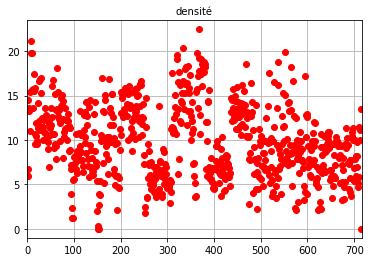

In [177]:
def arrayscale (Array, maxout):
    maxin = (np.max(Array))
    res =  np.multiply(Array, maxout/maxin)
    return np.round_(res, 3)


res=[]
for fichier in filelist:
    S = read(fichier)
    res.append(nbre_cell_sup_ampmoy4(S, 0, 26))
X = np.arange(len(res))
plt.plot(X, res, 'ro')
plt.grid()
#axeX = np.arange(11)
#plt.xticks(arrayscale(axeX,len(res)-1))
    
plt.xlim(-0.2, len(res)+0.2)
plt.ylim(-1, max(res)+1)
plt.title("densité", fontsize=10)
plt.show()


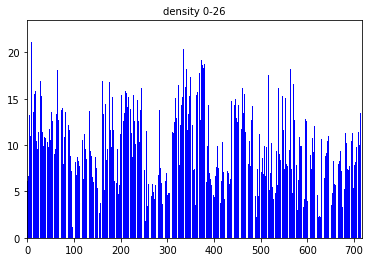

In [178]:
res=[]

def cell_sup_ampmoy(S):
    return nbre_cell_sup_ampmoy4(S, 0, 26)

for fichier in filelist:
    S = read(fichier)
    res.append(cell_sup_ampmoy(S))
X = np.arange(len(res))

plt.bar(X, res, align='edge', color='blue')
plt.xlim(-1, len(res)+1)
plt.ylim(0, max(res)+1)
plt.title("density 0-26", fontsize=10)
#plt.show()

dest = "rap2_nbre_cell_sup_ampmoy4.pdf"
   
plt.savefig(dest)

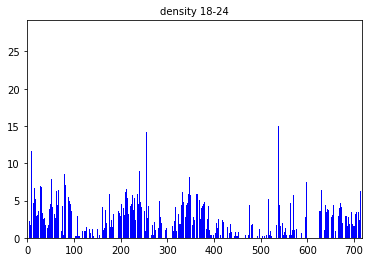

In [179]:
# densité sur zone de frequences variables
res=[]


def highcell_sup_ampmoy(S):
    return nbre_cell_sup_ampmoy4(S, 18, 24)

for fichier in filelist:
    S = read(fichier)
    res.append(highcell_sup_ampmoy(S))
X = np.arange(len(res))

plt.bar(X, res, align='edge', color='blue')
plt.xlim(-1, len(res)+1)
plt.ylim(0, max(res)+1)
plt.title("density 18-24", fontsize=10)
#plt.show()

dest = "rap2_nbre_cell_sup_ampmoy4_18-24.pdf"
   
plt.savefig(dest)

In [180]:
centroids = []
times = []
flatnesses = []

print(filelist[3])
print(sp_flatness(read(filelist[3])))


Ju01_DelinquentHabitsCALIFORNIAFeatSenDogCypressHill2017.wav_sr44100_deb00_15_00_t02_50_pas05_00.txt
0.784154451994584


In [181]:
def spectralEnv(S):
    res = []
    for k in range(27):
        res.append(np.sum(S[k])/(k+2))
    return res

#spectralEnv(S1)

In [182]:
#------------liste d'intervales-------------------------#
# Renvoie une liste d'intervales pour une taille donnée
def liste_intervales(nb, taille):
    taille_intervale = int(taille / nb)
    intervals = [0] * nb
    for i in range(0, nb):
        intervals[i] = taille_intervale
    ecart = taille - nb * taille_intervale
    milieu = int(nb / 2)
    i = 0
    while (ecart > 0):
        intervals[milieu + i] = intervals[milieu + i] + 1
        if(i <= 0):
            i = -i + 1
        else:
            i = -i
        ecart -= 1
    return intervals

def doubleXvals(list):
    res=[0]
    j = len(list)
    for i in range (j-2):
        res.append(list[i+1])
        res.append(list[i+1])
    res.append(list[j-1])
    return res

def doubleYvals(list):
    res=[]
    j = len(list)
    for i in range (j):
        res.append(list[i])
        res.append(list[i])
    return res

#res1 = spectralEnv(S1)

def plothistoenv(amps):
    nb_dx = len(amps)
    intervales = liste_intervales(nb_dx, 27)
    x = doubleXvals(dx2x(intervales))
    y = doubleYvals(amps)
    #print ("x", x)
    #print ("y", y)
    plt.plot(x, y, color="blue", linewidth=0.5)
    plt.fill_between(x, 0, y, color='blue', alpha=.25)



Ju01_DelinquentHabitsCALIFORNIAFeatSenDogCypressHill2017.wav_sr44100_deb00_05_00_t02_50_pas05_00.txt
4


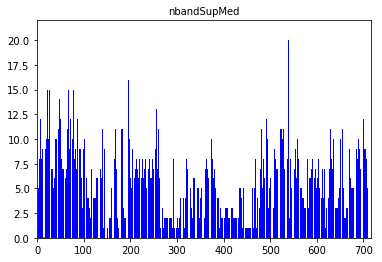

In [183]:
# nbre de band d'amplitude moyenne sup à max des Ampmoy des bande
def nbandSupMed(S):
    env = spectralEnv(S)
    ampMedian = np.max(env)/2
    res = 0
    for k in range (27):
        if (env[k] > ampMedian):
            res+=1
    return res

#tests
filetest = filelist[1]
print (filetest)
plothistoenv(spectralEnv(read(filetest)))

print (nbandSupMed(read(filetest)))

# graphique
res=[]

for fichier in filelist:
    S = read(fichier)
    res.append(nbandSupMed(S))
               
X = np.arange(len(res))

plt.bar(X, res, align='edge', color='blue')
plt.xlim(-1, len(res)+1)
plt.ylim(0, max(res)+1)
plt.title("nbandSupMed", fontsize=10)
#plt.show()

dest = "rap2_nbandSupMed.pdf"
   
plt.savefig(dest)

In [184]:
class Analyse:
    def __init__(self, filename, time, centroid, sd, c_min_sdlow, c_plus_sdHi, midi_centroid, 
                 mc_min_eclow, mc_plus_ecHi, midi_sp_slope, sp_slope, skewness, kurtosis, 
                 sp_rolloff, sp_flatness, sp_flatness_moy, sp_flatness_minamp, 
                 sp_flatness_minfreq, sp_flatness_maxamp, sp_flatness_maxfreq, 
                 sp_crest, rms, maxfreq25, max_amp, max_amoy, min_amp, max_freq, 
                 max_moy_freq, mode_freq1, mode_freq2, mode_freq3, cell_sup_ampmoy, highcell_sup_ampmoy, nbandSupMed):
        self.filename = filename
        self.time=time
        self.centroid=centroid
        self.sd=sd
        self.c_min_sdlow=c_min_sdlow
        self.c_plus_sdHi=c_plus_sdHi
        self.midi_centroid=midi_centroid
        self.mc_min_eclow=mc_min_eclow
        self.mc_plus_ecHi=mc_plus_ecHi
        self.midi_sp_slope=midi_sp_slope
        self.sp_slope=sp_slope
        self.skewness=skewness
        self.kurtosis=kurtosis
        self.sp_rolloff=sp_rolloff
        self.sp_flatness=sp_flatness
        self.sp_flatness_moy=sp_flatness_moy
        self.sp_flatness_minamp=sp_flatness_minamp
        self.sp_flatness_minfreq=sp_flatness_minfreq
        self.sp_flatness_maxamp=sp_flatness_maxamp
        self.sp_flatness_maxfreq=sp_flatness_maxfreq
        self.sp_crest=sp_crest
        self.rms=rms
        self.maxfreq25=maxfreq25
        self.max_amp=max_amp
        self.max_amoy=max_amoy
        self.min_amp=min_amp
        self.max_freq=max_freq
        self.max_moy_freq=max_moy_freq
        self.mode_freq1=mode_freq1
        self.mode_freq2=mode_freq2
        self.mode_freq3=mode_freq3
        self.cell_sup_ampmoy=cell_sup_ampmoy
        self.highcell_sup_ampmoy=highcell_sup_ampmoy
        self.nbandSupMed=nbandSupMed

In [185]:
with open('../Xparams_Rap2.txt', 'w') as f:
    for fichier in filelist:
        #print (fichier, file=f)
        #print (centroid(fichier))
        print(fichier + "\t" 
              +str(timetxt(fichier))+"\t"
              +str(centroid(read(fichier)))+"\t"
              +str(sd(read(fichier)))+"\t"
              +str(c_min_sdlow(read(fichier)))+"\t"
              +str(c_plus_sdHi(read(fichier)))+"\t"
              +str(midi_centroid(read(fichier)))+"\t"
              +str(mc_min_eclow(read(fichier)))+"\t"
              +str(mc_plus_ecHi(read(fichier)))+"\t"
              +str(midi_sp_slope(read(fichier)))+"\t"
              +str(sp_slope(read(fichier)))+"\t"
              +str(skewness(read(fichier)))+"\t"
              +str(kurtosis(read(fichier)))+"\t"
              +str(sp_rolloff(read(fichier)))+"\t"
              +str(sp_flatness(read(fichier)))+"\t"
              +str(sp_flatness_moy(read(fichier)))+"\t"
              +str(sp_flatness_minamp(read(fichier)))+"\t"
              +str(sp_flatness_minfreq(read(fichier)))+"\t"
              +str(sp_flatness_maxamp(read(fichier)))+"\t"
              +str(sp_flatness_maxfreq(read(fichier)))+"\t"
              +str(sp_crest(read(fichier)))+"\t"
              +str(rms(read(fichier)))+"\t"
              +str(maxfreq25(read(fichier)))+"\t"
              +str(max_amp(read(fichier)))+"\t"
              +str(max_amoy(read(fichier)))+"\t"
              +str(min_amp(read(fichier)))+"\t"
              +str(max_freq(read(fichier)))+"\t"
              +str(max_moy_freq(read(fichier)))+"\t"
              +str(mode_freq1(read(fichier)))+"\t"
              +str(mode_freq2(read(fichier)))+"\t"
              +str(mode_freq3(read(fichier)))+"\t"
              +str(nbre_cell_sup_ampmoy(read(fichier)))+"\t"
              +str(highcell_sup_ampmoy(read(fichier)))+"\t"
              +str(nbandSupMed(read(fichier))), file=f)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [186]:
centroids = []
times = []
flatnesses = []

def moyenne (list):
    return sum(list)/len(list)

#for metal_file in metal_files
fileR = filelist[0]
print (fileR)
for path, dirs, files in os.walk(folder_path):
    for filename in files:
        if fileR in filename :
            if 'txt' in filename :
                #print(filename)
                centroids.append(centroid(read(filename)))
print("moyenne centroid de l'œuvre complete : " + str(moyenne(centroids)) + " Hz")


Ju01_DelinquentHabitsCALIFORNIAFeatSenDogCypressHill2017.wav_sr44100_deb00_00_00_t02_50_pas05_00.txt
moyenne centroid de l'œuvre complete : 850.4301751209517 Hz
